In [1]:
# importing necessary libraries and configurations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import plot_plotly

%matplotlib inline

In [2]:
# loading the data set
df = pd.read_csv("df_53.csv")

In [3]:
# data cleaning and indexing 
df.drop("zip_code", axis=1, inplace=True)

df.occurred_date_time = df.occurred_date_time.astype("datetime64")
df.set_index(["occurred_date_time"], inplace=True)
df.sort_index(inplace=True)

# examining the new data frame
display(df.head())
display(df.tail())

highest_offense_description family_violence  \
occurred_date_time                                                
2003-01-01 00:00:00              IDENTITY THEFT               N   
2003-01-01 00:01:00           CRIMINAL MISCHIEF               N   
2003-01-01 00:01:00                  HARASSMENT               N   
2003-01-01 00:01:00     STATUTORY RAPE OF CHILD               N   
2003-01-01 00:01:00       THEFT BY EMBEZZLEMENT               N   

                        report_date_time                 location_type  \
occurred_date_time                                                       
2003-01-01 00:00:00  2010-04-14 14:59:00              RESIDENCE / HOME   
2003-01-01 00:01:00  2003-01-01 13:11:00         PARKING LOTS / GARAGE   
2003-01-01 00:01:00  2003-08-25 11:37:00              RESIDENCE / HOME   
2003-01-01 00:01:00  2003-04-25 12:51:00              RESIDENCE / HOME   
2003-01-01 00:01:00  2003-10-13 08:49:00  COMMERCIAL / OFFICE BUILDING   

                                     address  council_district apd_sector  \
occurred_date_time                                                          
2003-01-01 00:00:00            1088 PARK PLZ               4.0         ED   
2003-01-01 00:01:00    8800 N I 35 SB SVC RD               4.0         ID   
2003-01-01 00:01:00    9725 N I 35 NB SVC RD               NaN         ED   
2003-01-01 00:01:00  300 BLOCK W RUNDBERG LN               4.0         ED   
2003-01-01 00:01:00        313 E RUNDBERG LN               4.0         ED   

                     apd_district clearance_status       clearance_date  \
occurred_date_time                                                        
2003-01-01 00:00:00           3.0                O  2010-04-15 00:00:00   
2003-01-01 00:01:00           2.0                N                  NaN   
2003-01-01 00:01:00           7.0              NaN  2003-08-26 00:00:00   
2003-01-01 00:01:00           1.0                N                  NaN   
2003-01-01 00:01:00           1.0                C  2003-10-20 00:00:00   

                      latitude  longitude  year  month  week  day  hour  
occurred_date_time                                                       
2003-01-01 00:00:00  30.348871 -97.685233  2003      1     1    1     0  
2003-01-01 00:01:00  30.352849 -97.691828  2003      1     1    1     0  
2003-01-01 00:01:00  30.361871 -97.685342  2003      1     1    1     0  
2003-01-01 00:01:00        NaN        NaN  2003      1     1    1     0  
2003-01-01 00:01:00  30.359639 -97.691895  2003      1     1    1     0

highest_offense_description family_violence  \
occurred_date_time                                                
2020-12-11 16:42:00   AGG ROBBERY/DEADLY WEAPON               N   
2020-12-11 21:18:00                  HARASSMENT               N   
2020-12-12 04:00:00           CRIMINAL MISCHIEF               N   
2020-12-12 04:16:00                 AGG ASSAULT               N   
2020-12-12 11:35:00       BURGLARY OF RESIDENCE               N   

                        report_date_time          location_type  \
occurred_date_time                                                
2020-12-11 16:42:00  2020-12-11 16:42:00  PARKING LOTS / GARAGE   
2020-12-11 21:18:00  2020-12-12 14:00:00        OTHER / UNKNOWN   
2020-12-12 04:00:00  2020-12-12 12:10:00       RESIDENCE / HOME   
2020-12-12 04:16:00  2020-12-12 04:16:00  PARKING LOTS / GARAGE   
2020-12-12 11:35:00  2020-12-12 11:35:00       RESIDENCE / HOME   

                                   address  council_district apd_sector  \
occurred_date_time                                                        
2020-12-11 16:42:00     1400 E RUNDBERG LN               4.0         ED   
2020-12-11 21:18:00    11300 INDIANHEAD DR               7.0         ED   
2020-12-12 04:00:00         1102 DURHAM DR               4.0         ED   
2020-12-12 04:16:00  1127 PEARL RETREAT LN               7.0         ED   
2020-12-12 11:35:00      1411 DOMINIQUE DR               1.0         ED   

                     apd_district clearance_status clearance_date   latitude  \
occurred_date_time                                                             
2020-12-11 16:42:00           7.0              NaN            NaN  30.352273   
2020-12-11 21:18:00           4.0              NaN            NaN  30.379257   
2020-12-12 04:00:00           3.0              NaN            NaN  30.346837   
2020-12-12 04:16:00           6.0              NaN            NaN  30.394499   
2020-12-12 11:35:00           7.0              NaN            NaN  30.382328   

                     longitude  year  month  week  day  hour  
occurred_date_time                                            
2020-12-11 16:42:00 -97.677918  2020     12    50   11    16  
2020-12-11 21:18:00 -97.681115  2020     12    50   11    21  
2020-12-12 04:00:00 -97.687302  2020     12    50   12     4  
2020-12-12 04:16:00 -97.652211  2020     12    50   12     4  
2020-12-12 11:35:00 -97.658507  2020     12    50   12    11

In [4]:
# Creating violent crime and murder data frames for analysis
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')

# Annual overall crime (2017-present)
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime (2017-present)
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

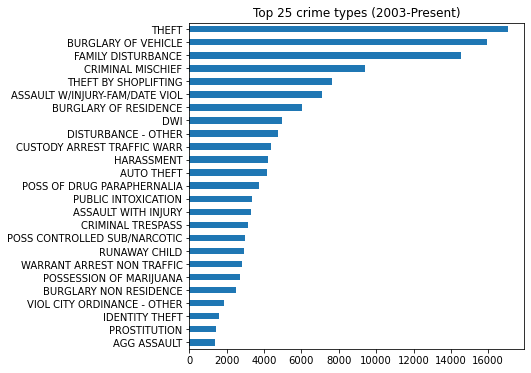

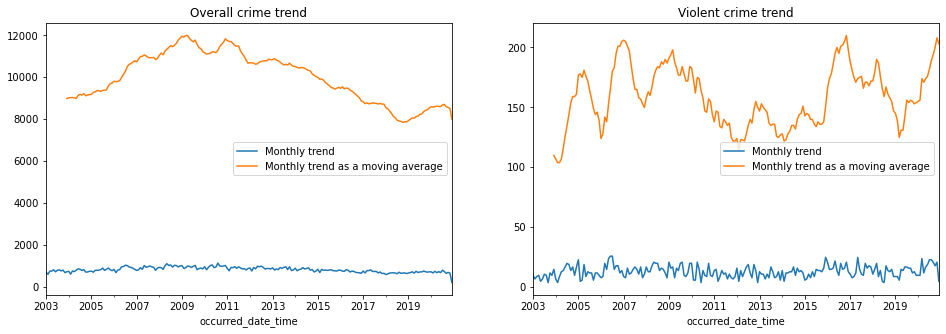

In [5]:
# Top 25 crime types
df.highest_offense_description.value_counts().head(25).sort_values().plot.barh(
    figsize=(6, 6), title="Top 25 crime types (2003-Present)"
)
plt.show()

fig, axs = plt.subplots(ncols=2, figsize=(16, 5))
df.resample("M").size().plot(ax=axs[0])
df.resample("M").size().rolling(12).sum().plot(title="Overall crime trend", ax=axs[0])
axs[0].legend(["Monthly trend", "Monthly trend as a moving average"])
df_viol.resample("M").size().plot(ax=axs[1])
df_viol.resample("M").size().rolling(12).sum().plot(
    title="Violent crime trend", ax=axs[1]
)
axs[1].legend(["Monthly trend", "Monthly trend as a moving average"])
plt.show()

Overall crime, 2017-present


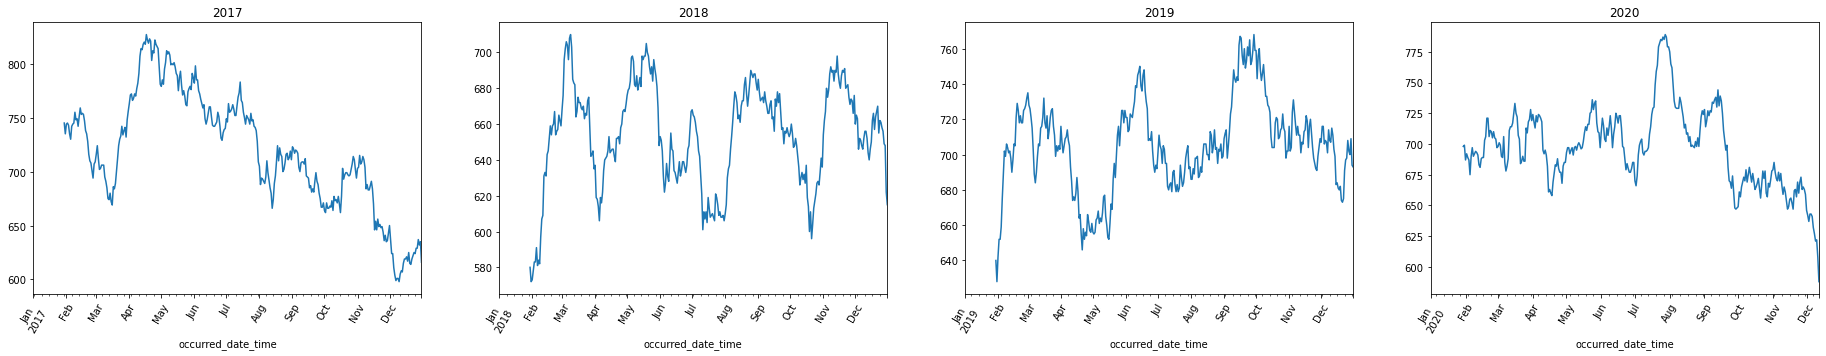

Violent crime, 2017-present


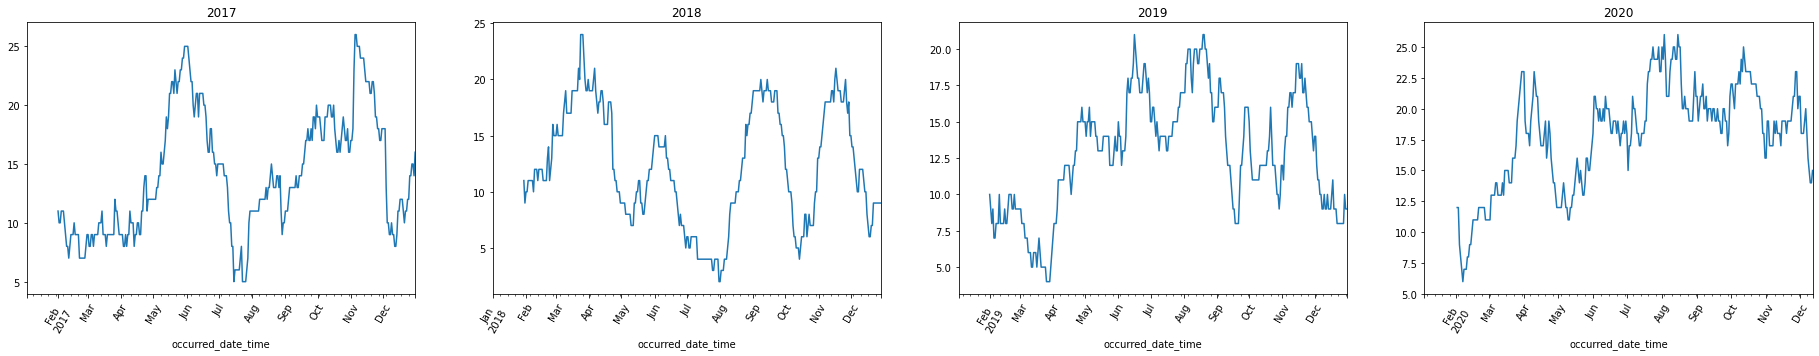

In [6]:
print("===========================")
print("Overall crime, 2017-present")
print("===========================")
fig, axs = plt.subplots(ncols=4, figsize=(32, 5))
df_17.resample("D").size().rolling(30).sum().plot(rot=60, title="2017", ax=axs[0])
df_18.resample("D").size().rolling(30).sum().plot(rot=60, title="2018", ax=axs[1])
df_19.resample("D").size().rolling(30).sum().plot(rot=60, title="2019", ax=axs[2])
df_20.resample("D").size().rolling(30).sum().plot(rot=60, title="2020", ax=axs[3])
plt.show()


print("===========================")
print("Violent crime, 2017-present")
print("===========================")
fig, axs = plt.subplots(ncols=4, figsize=(32, 5))
df_viol_17.resample("D").size().rolling(30).sum().plot(rot=60, title="2017", ax=axs[0])
df_viol_18.resample("D").size().rolling(30).sum().plot(rot=60, title="2018", ax=axs[1])
df_viol_19.resample("D").size().rolling(30).sum().plot(rot=60, title="2019", ax=axs[2])
df_viol_20.resample("D").size().rolling(30).sum().plot(rot=60, title="2020", ax=axs[3])
plt.show()

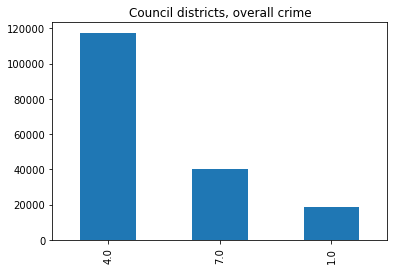

----------------------------------------------------------


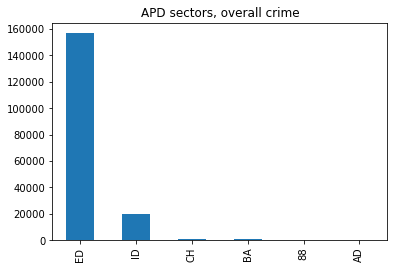

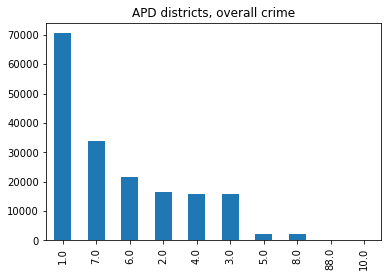

In [7]:
# Showing overall crime rates by council districts, APD districts, and sectors
df.council_district.value_counts().plot.bar(title="Council districts, overall crime")
plt.show()

print("----------------------------------------------------------")

df.apd_sector.value_counts().plot.bar(title="APD sectors, overall crime")
plt.show()

# print("----------------------------------------------------------")

df.apd_district.value_counts().plot.bar(title="APD districts, overall crime")
plt.show()

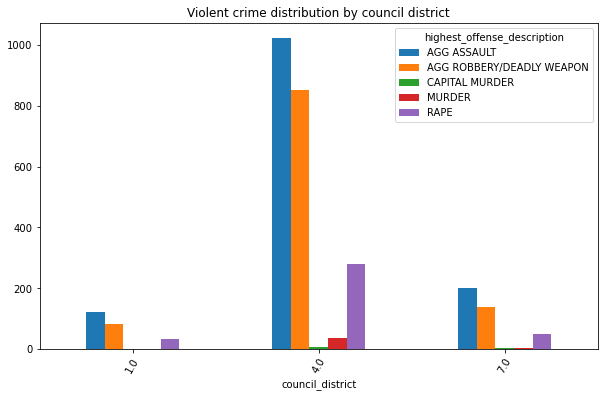

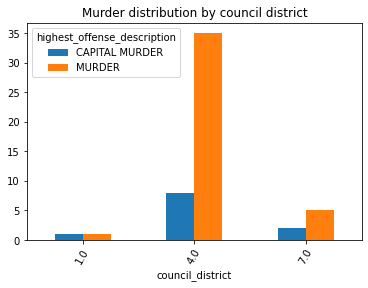

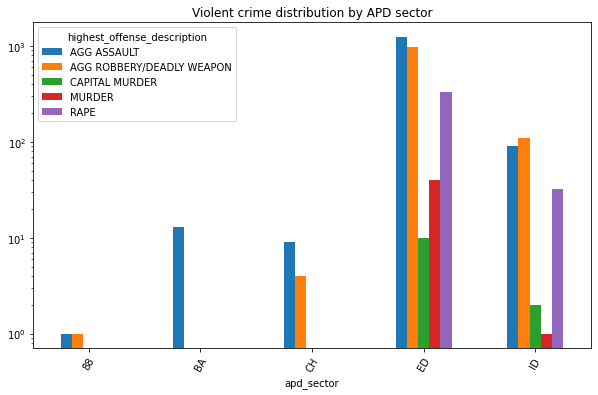

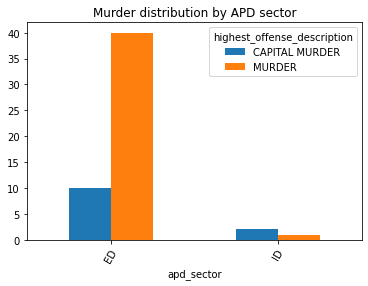

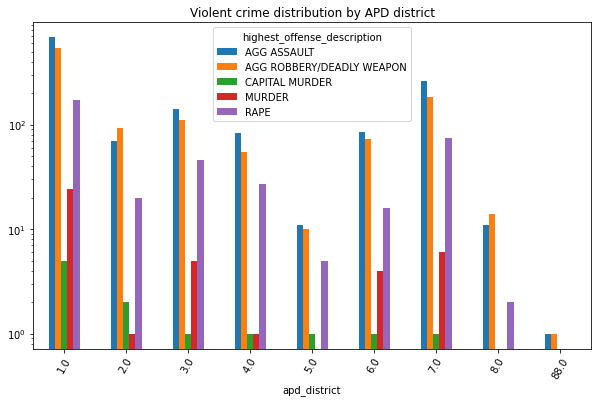

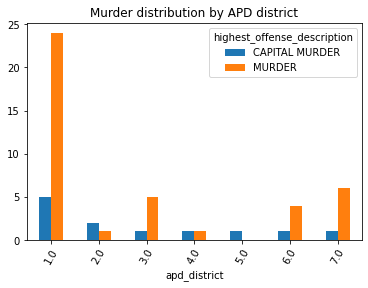

In [12]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    rot=60, figsize=(10, 6), title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(rot=60, title="Murder distribution by council district")
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    rot=60, figsize=(10, 6), logy=True, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    rot=60, title="Murder distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    rot=60,
    figsize=(10, 6),
    logy=True,
    title="Violent crime distribution by APD district",
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    rot=60, title="Murder distribution by APD district"
)
plt.show()

highest_offense_description                     AGG ASSAULT  \
location_type                                                 
ABANDONED/CONDEMNED STRUCTURE                             1   
AUTO DEALERSHIP NEW / USED                                0   
BANKS / SAVINGS & LOAN                                    0   
BAR / NIGHT CLUB                                         58   
CAMP / CAMPGROUND                                         1   
COMMERCIAL / OFFICE BUILDING                             24   
COMMUNITY CENTER                                          1   
CONSTRUCTION SITE                                         2   
CONVENIENCE STORE                                        17   
DEPARTMENT / DISCOUNT STORE                               9   
DRUG STORE / DR. OFFICE / HOSPITAL                        2   
FIELD / WOODS                                            32   
GAMBLING FACILITY / CASINO / RACE TRACK                   0   
GAS / SERVICE STATIONS                                   26   
GOVERNMENT / PUBLIC BUILDING                              0   
GROCERY / SUPERMARKET                                     4   
HOTEL / MOTEL / ETC.                                     76   
LAKE / WATERWAY                                           0   
LIQUOR STORE                                              1   
OTHER / UNKNOWN                                          18   
PARK / PLAYGROUND                                         6   
PARKING LOTS / GARAGE                                   361   
RENTAL STORAGE FACILITY                                   1   
RESIDENCE / HOME                                        345   
REST AREA                                                 0   
RESTAURANTS                                              11   
SCHOOL - COLLEGE / UNIVERSITY                             1   
SCHOOLS / COLLEGES                                        2   
SHOPPING MALL                                             1   
SPECIALTY  STORE (TV  FUR ETC.)                           2   
STREETS / HWY / ROAD / ALLEY                            348   
TRANSPORTATION (AIR / BUS / TRAIN - TERMINALS)            1   

highest_offense_description                     AGG ROBBERY/DEADLY WEAPON  \
location_type                                                               
ABANDONED/CONDEMNED STRUCTURE                                           3   
AUTO DEALERSHIP NEW / USED                                              1   
BANKS / SAVINGS & LOAN                                                  8   
BAR / NIGHT CLUB                                                        6   
CAMP / CAMPGROUND                                                       0   
COMMERCIAL / OFFICE BUILDING                                           54   
COMMUNITY CENTER                                                        0   
CONSTRUCTION SITE                                                       0   
CONVENIENCE STORE                                                      39   
DEPARTMENT / DISCOUNT STORE                                            12   
DRUG STORE / DR. OFFICE / HOSPITAL                                      3   
FIELD / WOODS                                                           5   
GAMBLING FACILITY / CASINO / RACE TRACK                                 2   
GAS / SERVICE STATIONS                                                 33   
GOVERNMENT / PUBLIC BUILDING                                            0   
GROCERY / SUPERMARKET                                                   8   
HOTEL / MOTEL / ETC.                                                   58   
LAKE / WATERWAY                                                         2   
LIQUOR STORE                                                            2   
OTHER / UNKNOWN                                                        23   
PARK / PLAYGROUND                                                       1   
PARKING LOTS / GARAGE                                                 429   
RENTAL ST

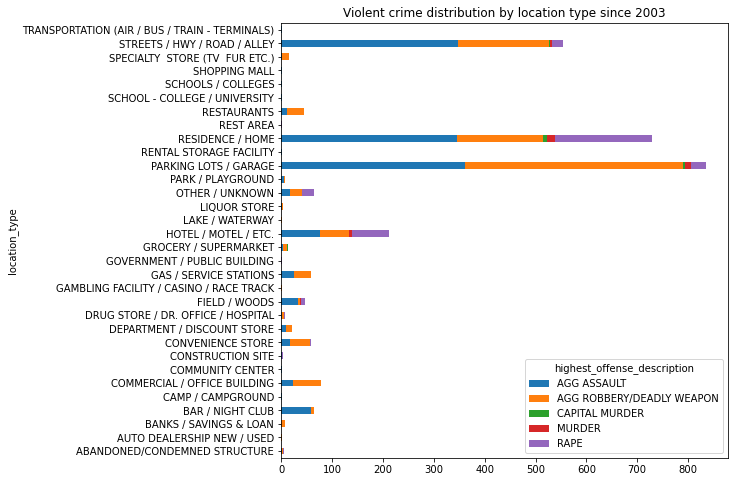

----------------------------------


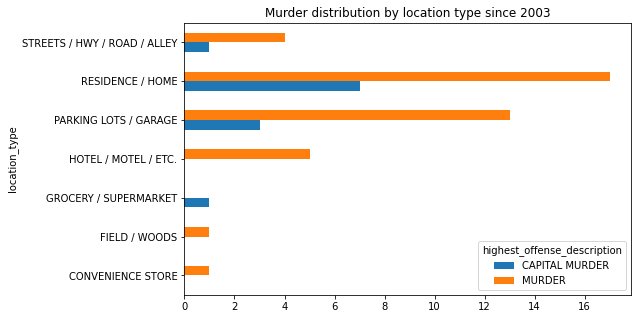

In [9]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)

mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

viol_loc.plot.barh(
    figsize=(8, 8),
    stacked=True,
    title="Violent crime distribution by location type since 2003",
)
plt.show()

print("----------------------------------")

mur_loc.plot.barh(
    figsize=(8, 5), title="Murder distribution by location type since 2003"
)
plt.show()

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


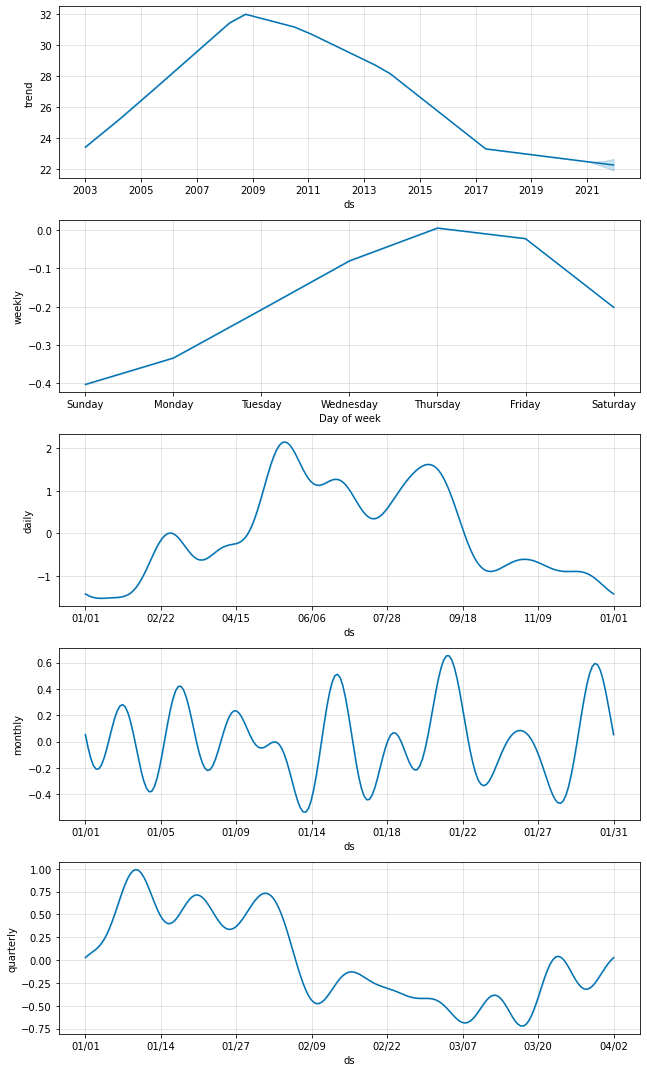

In [10]:
df_fbprophet = df

df_m = df_fbprophet.resample("D").size().reset_index()
df_m.columns = ["date", "daily_crime_count"]
df_m_final = df_m.rename(columns={"date": "ds", "daily_crime_count": "y"})

m = Prophet(interval_width=0.95, yearly_seasonality=False)
m.add_seasonality(name="monthly", period=30.5, fourier_order=10)
m.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
m.add_seasonality(name="weekly", period=52, fourier_order=10)
m.add_seasonality(name="daily", period=365, fourier_order=10)
m.fit(df_m_final)

future = m.make_future_dataframe(periods=365, freq="D")
pred = m.predict(future)

fig2 = m.plot_components(pred)
fig2_1 = plot_plotly(m, pred)
fig2_1

INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.


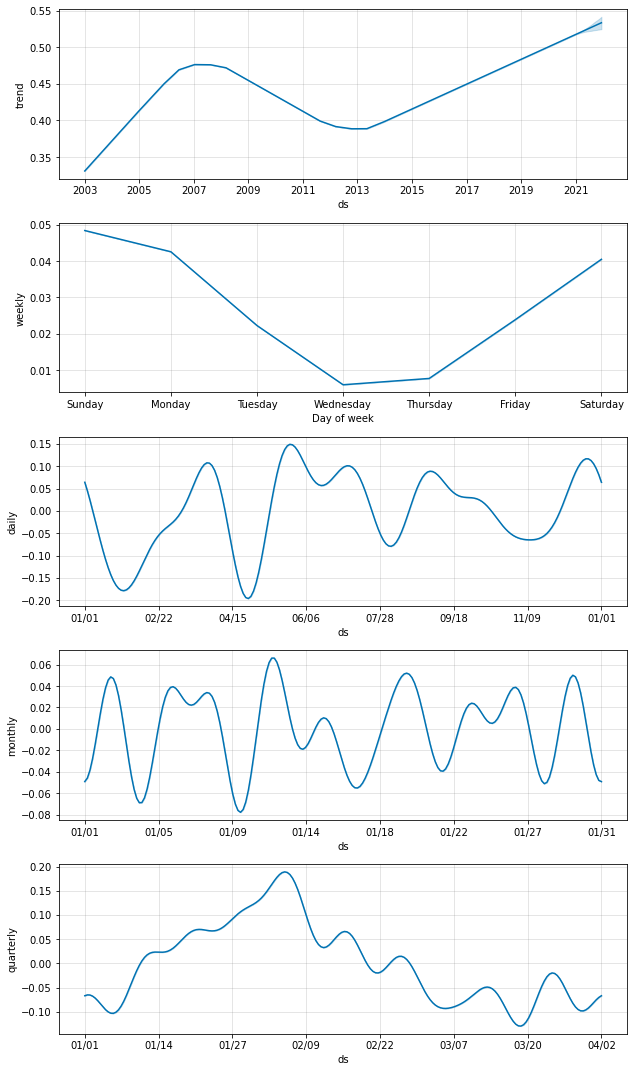

In [11]:
df_viol_fbprophet = df_viol

df_viol_n = df_viol_fbprophet.resample("D").size().reset_index()
df_viol_n.columns = ["date", "daily_crime_count"]
df_viol_n_final = df_viol_n.rename(columns={"date": "ds", "daily_crime_count": "y"})

n = Prophet(interval_width=0.95, yearly_seasonality=False)
n.add_seasonality(name="monthly", period=30.5, fourier_order=10)
n.add_seasonality(name="quarterly", period=91.5, fourier_order=10)
n.add_seasonality(name="weekly", period=52, fourier_order=10)
n.add_seasonality(name="daily", period=365, fourier_order=10)
n.fit(df_viol_n_final)

future = n.make_future_dataframe(periods=365, freq="D")
pred = n.predict(future)

fig3 = n.plot_components(pred)
fig3_1 = plot_plotly(n, pred)
fig3_1